# Введение

**Поступило задание от интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.** 
 
**Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт, спланировать рекламные кампании и дать соответствующие рекомендации** 

**Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. С ними и предстоит провести работу**

## Данные

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st

In [3]:
data = pd.read_csv('datasets/games.csv')
display(data.head(10))
display(data.info())
print('Количество явных дубликатов =', data.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Количество явных дубликатов = 0


Вызвав общую информацию методом .info() можно заметить следующие проблемы:
 - пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating
 - столбец Year_of_Release имеет тип данных float, год это целое число (int)
 - столбец Critic_Score имеет тип данных float, в таблице оценки это целые числа
 - столбец User_Score имеет тип данных object, должен быть float 
 - названия столбцов нужно привести к нижнему регистру
 
**Теперь подробнее посмотрим на проблемные столбцы**

In [248]:
display(data[data['Name'].isna()])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [249]:
display(data[data['Genre'].isna()])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [250]:
display(data[data['Year_of_Release'].isna()]) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [251]:
display(data[data['Critic_Score'].isna()]) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [252]:
display(data[data['User_Score'].isna()]) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [253]:
display(data[data['Rating'].isna()]) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [254]:
display(data['User_Score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [255]:
display(data.duplicated().sum())

0

- пропуски в столбцах Name и Genre находятся в одинаковых строках. По платформе и году выпуска видно, что это одна и та же игра, только в одной строке продажи в Америке и Европе, а в другой только в Японии
- из-за значения 'tbd' столбец User_Score имеет тип данных object 

### Вывод

- пропуски в столбцах Name и Genre находятся в одинаковых строках с одинаковой игрой, в строках указаны продажи по разным регионам
- столбец Year_of_Release имеет тип данных float, год это целое число (int), пропуски ничем не обоснованы, интернет-магазин просто мог не получить эту информацию
- столбец Critic_Score имеет тип данных float, в таблице оценки это целые числа
- столбец User_Score имеет тип данных object из-за значения 'tbd'. tbd аббревиатура "to be determined" - подлежит определению, значит оценки на момент выгрузки данных еще нет
- пропуски в столбцах Critic_Score, User_Score и Rating, могут быть обусловлены тем, что крупные платформы освещающие рынок игр, так же как и организация ESRB появились только во второй половины 1990-х, соответственно, игры, вышедшие в этот период могли обделить вниманием
- названия столбцов нужно привести к нижнему регистру
- дубликатов не обнаружены

##  Предобработка

### Приведение столбцов к нижнему регистру

In [256]:
data.columns = data.columns.str.lower()
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных

In [257]:
data['year_of_release'] = data['year_of_release'].astype('Int64') # год - целое число
# tbd можно заменить на NaN, т.к. оценки по факту нет
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype(float) # оценки игроков - дробные числа
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Пропуски в столбце year_of_release можно заполнить годом выпуска этой же игры на другой платформе

In [258]:
print('Количество пропусков до обработки:',data['year_of_release'].isna().sum())
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()
print('Количество пропусков после обработки:',data['year_of_release'].isna().sum())

Количество пропусков до обработки: 269
Количество пропусков после обработки: 146


Пропуски в name и genre в одинаковых строках, так же у этой неизвестной игры нет ни оценок ни рейтинга, можно спокойной её удалить

In [259]:
data.drop([659, 14244],inplace=True)
data = data.reset_index(drop=True)

In [260]:
data['rating'] = data['rating'].fillna(value='RP')

Пропуски в critic_score, user_score и rating восстановлению не подлежат. critic_score, user_score нельзя заполнять средним или медианным значениями, так как у каждой игры своя субъективная оценка при которой учитывается огромное количество факторов. С пропусками в столбце rating немного сложнее, скорее всего можно утверждать, что у игр определённого жанра будет определённый рейтинг, но не всегда. Для игр жанра Action будет существенный разброс по рейтингу. Например, игры LEGO Batman: The Videogame и GTA V можно отнести к жанру Action, но возрастной рейтинг у них сильно отличается. Принято решение заполнить пропуски в столбце rating значением RP (Rating Pending — Рейтинг ожидается)

### Суммарные продажи

In [261]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


### Вывод

Столбцы переименованы, данные преобразованы. Заполнены пропуски, где это возможно, решения по пропускам обоснованы. Добавлен новый столбец с суммарными продажами

##  Исследовательский анализ данных

### Выпуск игр по годам

<AxesSubplot:xlabel='year_of_release'>

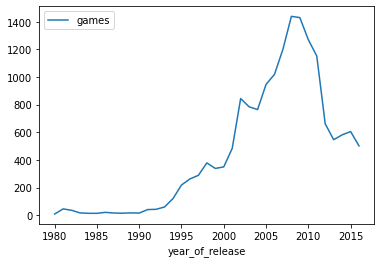

In [262]:
# создание сводной таблицы
year_of_release_pt = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
# переименование колонки
year_of_release_pt.columns = ['games']
# график
display(year_of_release_pt.plot())

Период с 1980 по начало 1990-х характеризуется малым выпуском игр, это колыбель игровой индустрии, технологии ещё недоразвиты.

Всё начинает менятся с 1993 года, количество игр начинает расти. Технологии развивались, появились персональные компьютеры. Основными достижениями в те времена было бурное развитие полноценного 3D и появление нескольких новых игровых жанров. Постепенно игровая индустрия развивалась, 

Рост продолжался вплоть до 2008 года, от количества решили отойти в сторону качества. Крупнейшие разработчики игр находятся в постоянной конкуренции, некоторые из них делают игры несколько лет в угоду качеству и уникальности

Для исследования весь период представленный в данных не нужен, т.к. информация поздних годов не актуальна

### Выпуск игр на разных платформах

In [263]:
# Выводим топ-10 платформ по продажам за всё время
platform_pt = pd.pivot_table(data, index=['platform'], values='total_sales', aggfunc='sum')
platform_pt = platform_pt.sort_values('total_sales',ascending=False).head(10)
display(platform_pt)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


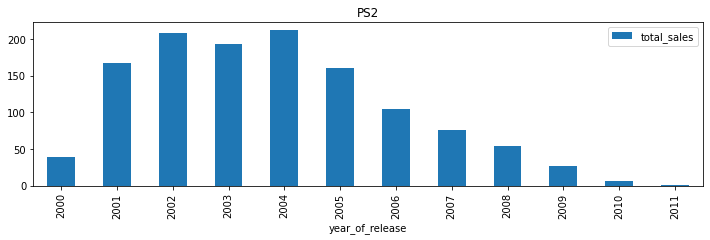

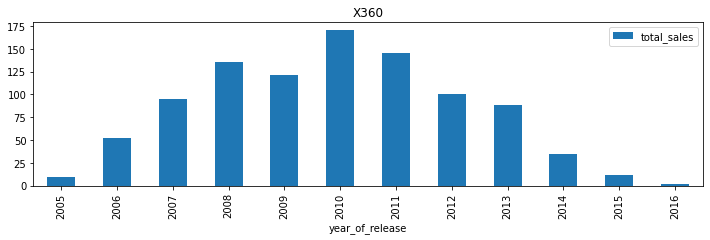

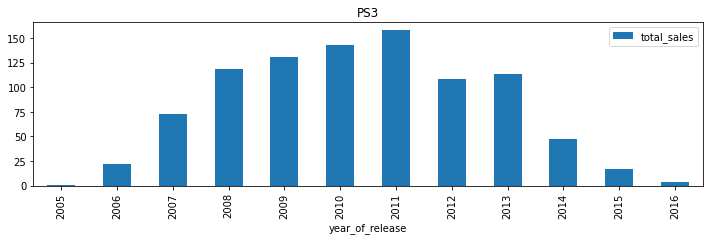

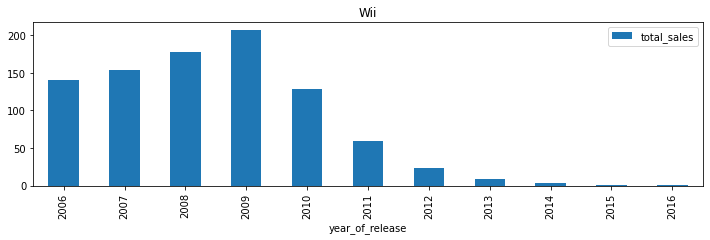

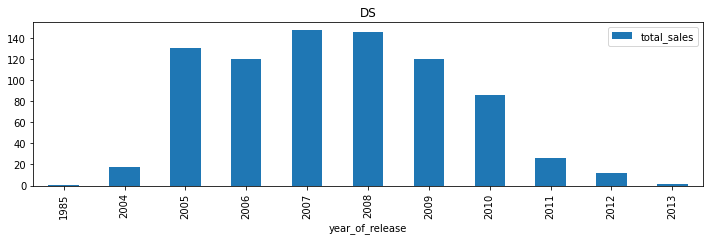

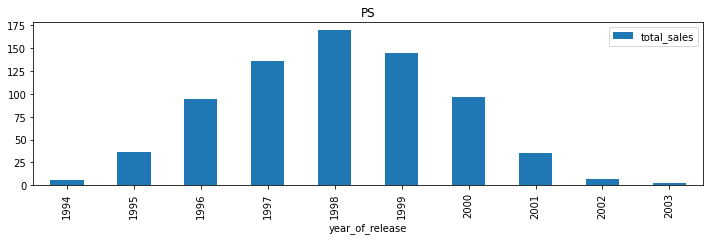

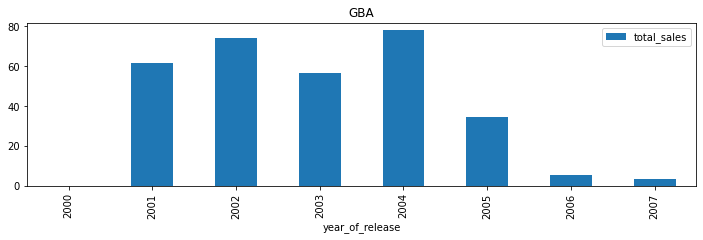

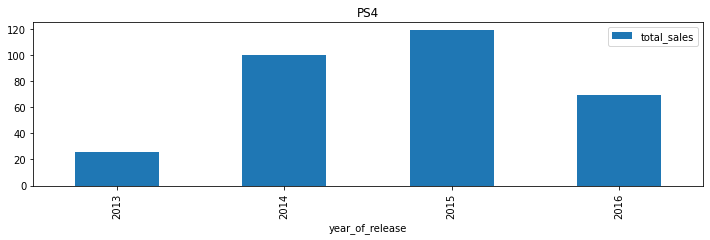

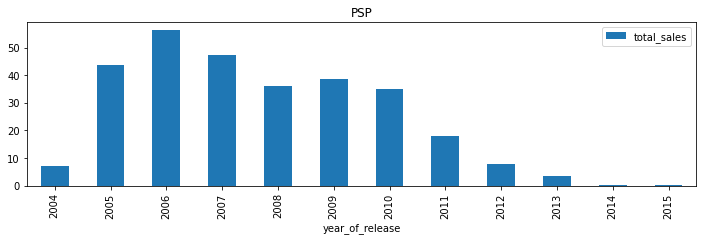

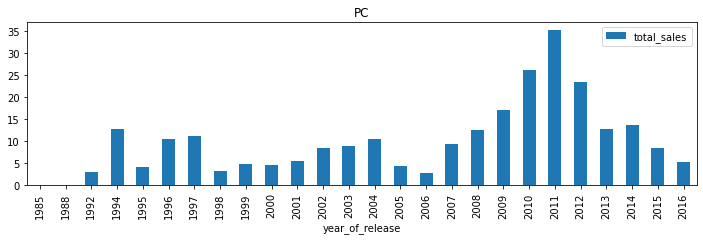

In [264]:
import matplotlib.pyplot as plt
platform_grouped = platform_pt.reset_index()
top_platforms = platform_grouped['platform'].unique()
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(12,3))
    plt.title(platform)

**Вывод**
- Самая дохожная платформа PS2
- Период жизни платформы длится в среднем от 8 до 10 лет
- Топ продаж платформы происходит через 2-5 лет после запуска платформы
- Из всех платформ в топ 10 только PC не умирает, каждые 5-8 лет происходят всплески и падения продаж
- Самый показательный пример жизни платформы это приставка PlayStation. Каждые 5-7 лет выпускается приставка нового поколения, и приставка предыдущего поколения живёт еще года 3  

### Актуальный период

Актуальным периодом можно считать период с 2013 по 2016

Причины:
- Большей части платформ уже нет к 2016 году, нужны актуальные и свежие (PS4 вышла в 2013 году)
- Разработка игры ведётся примерно 2-4 года (игры разработка которых началась в 2013 выйдут в 2017)
- С начала 2010-х наблюдается тенденция к снижению количества в угоду качеству

In [265]:
actual_data = data.query('year_of_release > 2012')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   Int64  
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     994 non-null    float64
 9   user_score       1195 non-null   float64
 10  rating           2237 non-null   object 
 11  total_sales      2237 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.4+ KB


### Актуальные платформы

Составим таблицу с самыми прибыльными платформами за актуальный период

In [266]:
actual_platform_pt = pd.pivot_table(actual_data, index=['platform'], values='total_sales', aggfunc='sum')
actual_platform_pt.sort_values(by='total_sales',ascending = False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,40.06
PSV,32.99
Wii,13.66


По продажам лидируют PS4, PS3, XOne, 3DS

Теперь посмотрим продажи в разбивке по годам

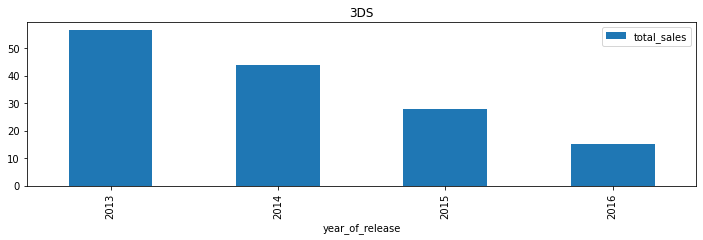

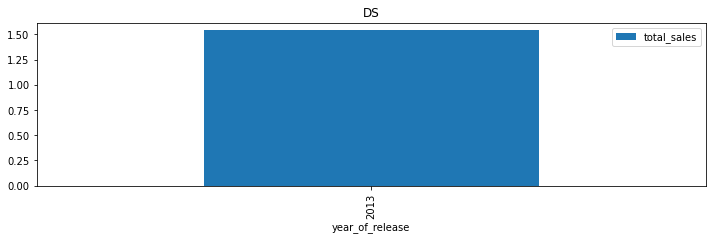

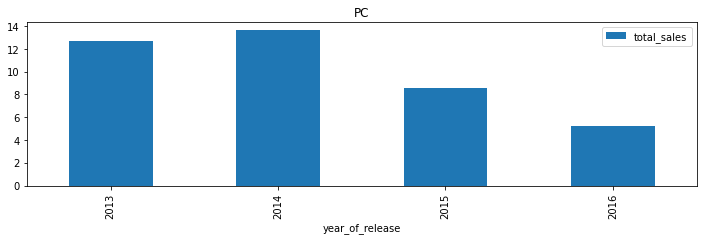

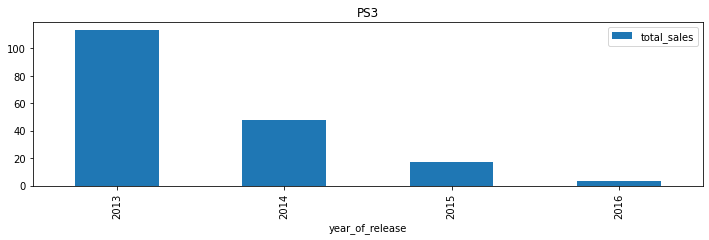

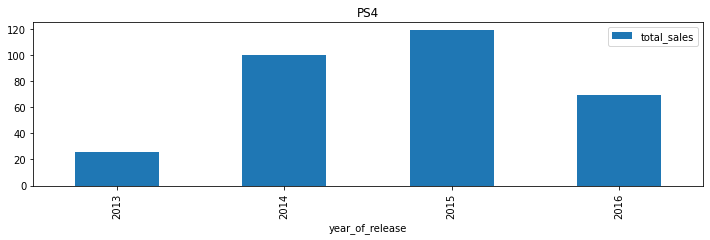

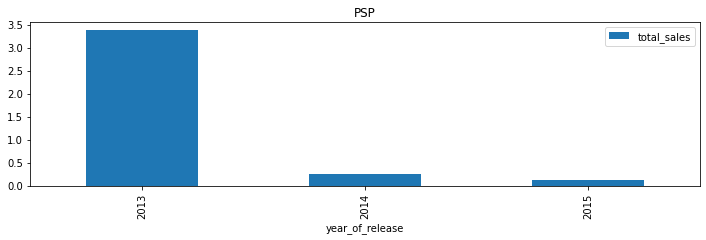

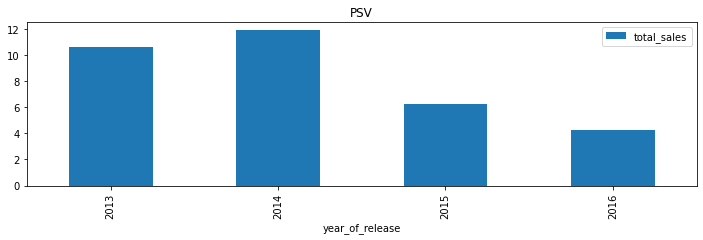

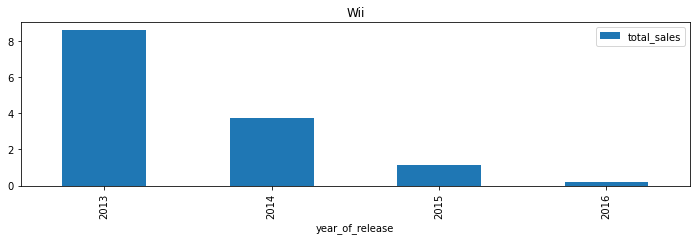

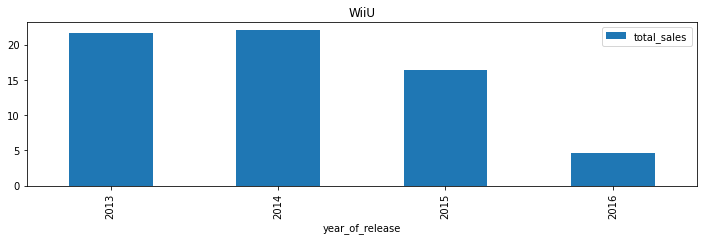

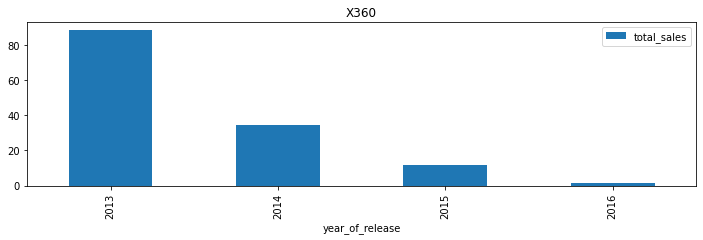

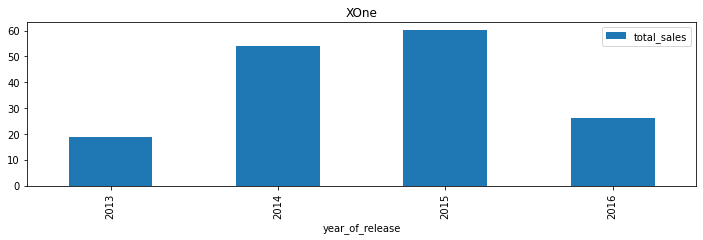

In [267]:
actual_platform_grouped = actual_platform_pt.reset_index()
top_actual_platforms = actual_platform_grouped['platform'].unique()
for platform in top_actual_platforms:
    actual_data[actual_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(12,3))
    plt.title(platform)

В целом у всех платформ идёт снижение продаж, что и не удивительно, учитывая общую тенденцию снижения выпуска игр

В наихудшем положении находятся платформы старого поколения, которые уже ничего не могут предложить и которые были заменены новыми. Среди них PS3, X360, DS, Wii и PSP. Соответственно потенциально прибыльными можно считать PS4 и XOne.

PC как всегда стабилен

**Перейдем к диаграммам размаха**

count    2237.000000
mean        0.487957
std         1.234181
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

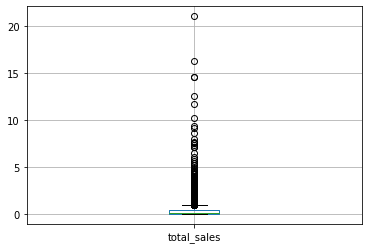

In [268]:
actual_data.boxplot(column = 'total_sales')
display(actual_data['total_sales'].describe())

In [269]:
top_platforms = actual_data[actual_data['platform'].isin(['PS4','PS3','XOne','3DS','X360','WiiU','PC'])]
top_platforms = top_platforms[top_platforms['total_sales']<22] # обрубаем до максимального значения в таблице, иначе - ошибка
display(top_platforms.groupby('platform')['total_sales'].describe().sort_values(by='count', ascending = False))

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.06,0.200,0.730,14.63
PS3,345.0,0.525884,1.451939,0.01,0.04,0.150,0.510,21.05
3DS,303.0,0.472772,1.381347,0.01,0.04,0.090,0.280,14.60
XOne,247.0,0.645020,1.036139,0.01,0.06,0.220,0.685,7.39
PC,192.0,0.208646,0.349801,0.01,0.03,0.080,0.230,3.05
X360,186.0,0.735484,1.663275,0.01,0.08,0.265,0.795,16.27
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.200,0.595,7.09


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

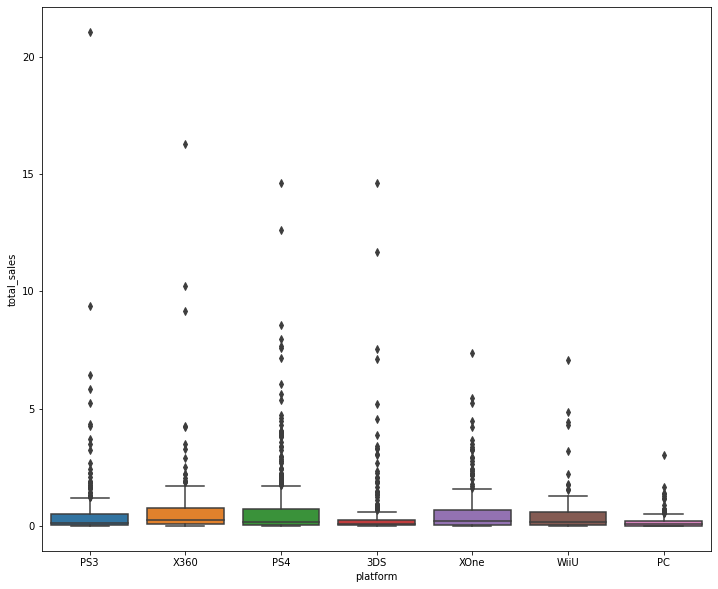

In [270]:
plt.figure(figsize=(12,10))
sns.boxplot(data=top_platforms, x='platform', y='total_sales')

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

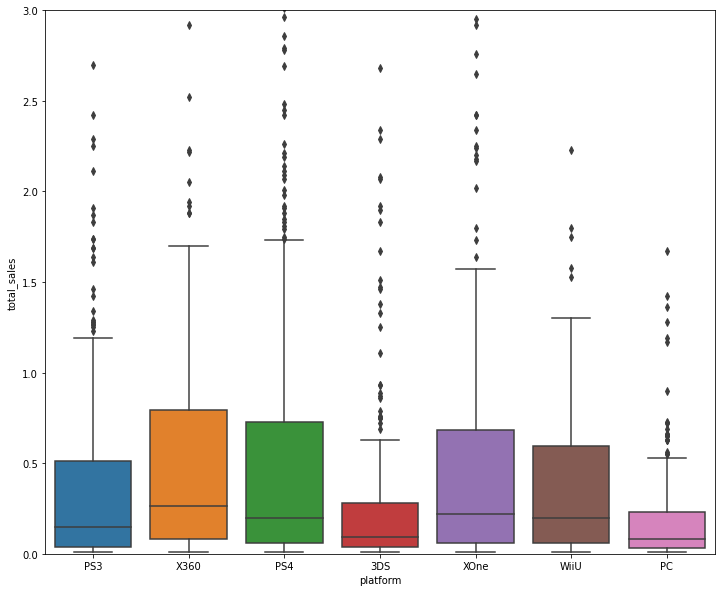

In [271]:
plt.figure(figsize=(12,10))
plt.ylim(0,3)
sns.boxplot(data=top_platforms, x='platform', y='total_sales')

**Вывод**
- Средняя выручка за игру по миру 488000, при этом подавляющее большинство игр не смогли преодолеть эту цифру, что не удивительно. На рынке видеоигр огромное разнообразие, но при этом реально выдающееся произведение попадается редко. Шедевры продаются в огромном количестве.
- Самая высокая средняя выручка у платформы PS4, а самая продаваемая игра у PS3. Обе эти платформы лидируют по количеству игр
- В целом по платформам не наблюдается большой разброс в средних значениях
- У PS4 и 3DS наблюдается тенденция к росту продаж,т.к. среднее больше 3-го квартиля

### Влияние отзывов на продажи

Для начала посмотрим на влияние отзывов в рамках платформы PS4

Корреляция между продажами и оценкой критиков: 0.40656790206178095


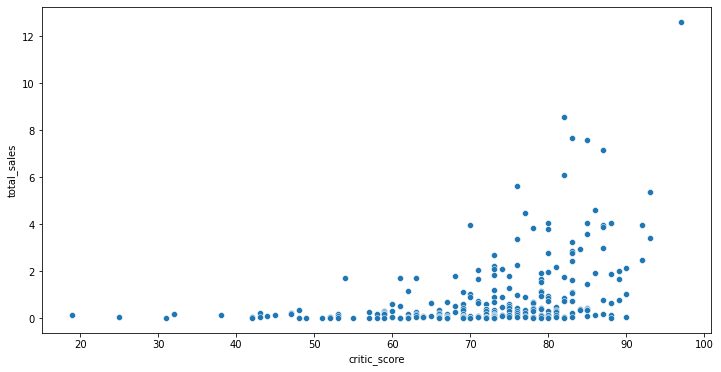

In [272]:
PS4 = actual_data[actual_data['platform']=='PS4']
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)
print('Корреляция между продажами и оценкой критиков:',PS4['critic_score'].corr(PS4['total_sales']))


Корреляция между продажами и оценкой пользователей: -0.031957110204556376


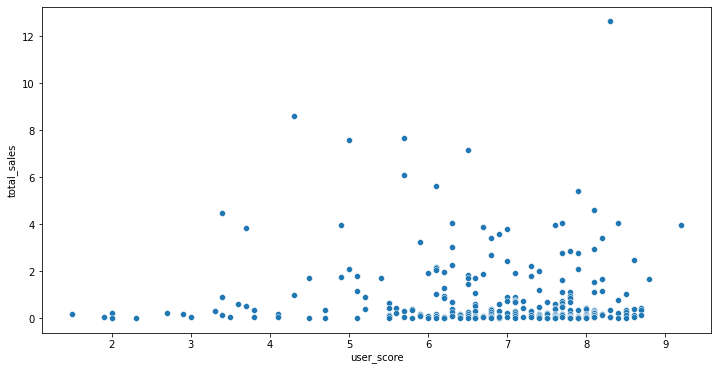

In [273]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=PS4)
print('Корреляция между продажами и оценкой пользователей:',PS4['user_score'].corr(PS4['total_sales']))

Оценки пользователей никак не влияют на количество продаж, зато оценки критиков имеет умеренное влияние

Теперь посмотрим на другие платформы

In [274]:
platform_list = ['PS3','XOne','3DS','X360','WiiU','PC']
def platform_corr(name):
    platform = actual_data[actual_data['platform']==name]
    user = platform['user_score'].corr(platform['total_sales'])
    critic = platform['critic_score'].corr(platform['total_sales'])
    print('Корреляция между продажами и оценкой пользователей у игровой платформы ', name, user)
    print('Корреляция между продажами и оценкой критиков у игровой платформы ', name, critic)
for platform in platform_list:
    platform_corr(platform)

Корреляция между продажами и оценкой пользователей у игровой платформы  PS3 0.0023944027357566925
Корреляция между продажами и оценкой критиков у игровой платформы  PS3 0.3342853393371919
Корреляция между продажами и оценкой пользователей у игровой платформы  XOne -0.06892505328279414
Корреляция между продажами и оценкой критиков у игровой платформы  XOne 0.4169983280084017
Корреляция между продажами и оценкой пользователей у игровой платформы  3DS 0.24150411773563016
Корреляция между продажами и оценкой критиков у игровой платформы  3DS 0.3570566142288103
Корреляция между продажами и оценкой пользователей у игровой платформы  X360 -0.011742185147181342
Корреляция между продажами и оценкой критиков у игровой платформы  X360 0.3503445460228664
Корреляция между продажами и оценкой пользователей у игровой платформы  WiiU 0.4193304819266187
Корреляция между продажами и оценкой критиков у игровой платформы  WiiU 0.3764149065423912
Корреляция между продажами и оценкой пользователей у игровой

Полезно будет посмотреть на корреляцию между оценками критиков и пользователей. Есть теория, что пользователи смотрят на оценку критиков, и уже на её основе дают свою

In [275]:
display(actual_data['critic_score'].corr(actual_data['user_score']))

0.5027020978837679

И да, связь есть, хоть и не очевидная

**Вывод**

- У всех платформ умеренная корреляция между продажами и оценкой критиков, выделяется только PC с самой слабой корреляцией
- У всех платформ очень слабая корреляция между продажами и оценкой пользователей, кроме 3DS, где корреляция составляет 0.24. Не сильная, но всё же есть
- Оценки критиков умеренно влияют на оценки пользователей

### Распределение по жанрам

In [276]:
genre_pt = pd.pivot_table(actual_data, index='genre', values='total_sales', aggfunc='sum')
genre_pt.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,322.50
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,63.06
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Самыми популярными жанрами игр являются: Action, Shooter, Sports, Role-Playing
Популярность экшенов и шутеров обусловлена простотой освоения и большим ассортиментом игр. Большинство бестселлеров создаются именно в этих жанрах, на разработку вливают огромные средства и получают качественную, захватывающую и увлекательную игру. Со спортивными играми всё проще, спорт сам по себе популярен. С RPG уже интереснее, недаром жанр называется Role-Play (отыгрыш роли). Жанру присуща большая вариативность, прямое влияние действий игрока на окружающий мир и его историю. Люди отыгрывают роль, становятся теми, кем хотят.

### Вывод

- Начиная с середины 1990-х игровая индустрия начала бурное развитие, неутомимый рост продолжался вплоть до начала 2010-х годов, когда на первое место начало выходить не количество, а качество продукта
- Самыми популярными платформами за всё время являются PlayStation 2, PlayStation 3, XBOX 360, Nintendo WII и Nintendo DS. В актуальный период PlayStation 4, PlayStation 3, XBOX One, 3DS
- Период жизни платформы длится в среднем от 8 до 10 лет, пик продаж на платформе обычно происходит на 3 год жизни, потом платформа заменяется новым поколением (не относится к PC)
- Перспективные платформы: PlayStation 4, XOne, 3DS
- Для игр всех платформ наблюдается умеренная зависимость продаж от оценок критиков, в то время как оценки пользователей на продажи не влияют
- Action - самый популярный жанр игр в актуальный период

## Пользователи по регионам

### Платформы

Топ 5 платформ в Северной Америке

In [277]:
na_data = actual_data.query('na_sales > 0')
na_data_pt = pd.pivot_table(na_data, index='platform', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
display(na_data_pt)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


Топ 5 платформ в Европе

In [278]:
eu_data = actual_data.query('eu_sales > 0')
eu_data_pt = pd.pivot_table(eu_data, index='platform', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
display(eu_data_pt)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


Топ 5 платформ в Японии

In [279]:
jp_data = actual_data.query('jp_sales > 0')
jp_data_pt = pd.pivot_table(jp_data, index='platform', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
display(jp_data_pt)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


В Европе и Америке самой популярной платформой является PS4, а в Японии 3DS

Популярность определённой платформы обусловлена её фирмой производителем, для Америки это Microsoft с XBOX-ами, а для японии Nintendo с 3DS, каждая компания сильнее влияет на свой рынок. Компания Sony, производящая PlayStation имеет большое влияние и хорошую репутацию, что позволяет ей иметь большУю часть в рынка во всех регионах.

### Жанры

Топ 5 жанров в Северной Америке

In [280]:
na_genre_pt = pd.pivot_table(na_data, index='genre', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
display(na_genre_pt)

,na_sales
genre,
Action,126.13
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


Топ 5 жанров в Европе

In [281]:
eu_genre_pt = pd.pivot_table(eu_data, index='genre', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
display(eu_genre_pt)

,eu_sales
genre,
Action,118.61
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


Топ 5 жанров в Японии

In [282]:
jp_genre_pt = pd.pivot_table(jp_data, index='genre', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
display(jp_genre_pt)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.44
Fighting,7.65
Shooter,6.61


Топ 5 жанров для Европы и Америки выглядит почти одинаково, в безусловных лидерах экшены и шутеры. Однако в Японии экщен уступил первое место ролевым играм

### Рейтинг ESRB

Северная Америка

In [283]:
na_rating_pt = pd.pivot_table(na_data, index='rating', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_rating_pt)

,na_sales
rating,
M,165.29
RP,89.42
E,79.05
E10+,54.24
T,49.79


Европа

In [284]:
eu_rating_pt = pd.pivot_table(eu_data, index='rating', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_rating_pt)

,eu_sales
rating,
M,145.80
E,83.36
RP,78.91
E10+,42.69
T,41.95


Япония

In [285]:
jp_rating_pt = pd.pivot_table(jp_data, index='rating', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_rating_pt)

,jp_sales
rating,
RP,85.29
T,20.59
E,15.14
M,14.11
E10+,5.89


По каждому региону рейтинг влмяет на продажи. В Америке и Европе популярны игры для 17+,при этом в Америке на втором месте игры без рейтинга, а в Европе игры для всех возрастов. В Японии самыми популярными являются игры без рейтинга и с рейтингом 13+

### Вывод

Портреты для среднестатистических игроков по каждому региону:
- Северная Америка. Игрок от 17 лет, играет на PlayStation или XBOX в экшены и шутеры, реже в спортивные игры и рпг
- Европа. Игрок от 17 лет, чаще играет на PlayStation чем на XBOX в экшены и шутеры, реже в спортивные игры, рпг, гонки, безрейтинговые игры
- Япония. Игрок от 13 лет, чаще играет на портативной 3DS в рпг, экшены и безрейтинговые игры, реже в файтинги

## Гипотезы


Так как дальше будут проверяться равенства средних двух генеральных совокупностей, будет применяться t-тест со значением alpha 0.01

### Средние пользовательские рейтинги платформ Xbox One и PC

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [286]:
XOne_user_scores = actual_data.query('platform == "XOne"')['user_score'].dropna()
PC_user_scores = actual_data.query('platform == "PC"')['user_score'].dropna()
alpha = 0.01
results = st.ttest_ind(XOne_user_scores, PC_user_scores, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports отличаются

In [287]:
action_user_scores = actual_data.query('genre == "Action"')['user_score'].dropna()
sports_user_scores = actual_data.query('genre == "Sports"')['user_score'].dropna()
alpha = 0.01
results = st.ttest_ind(action_user_scores, sports_user_scores, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


### Вывод

Проведя t-тест были проверены две гипотезы:

1. Гипотеза о равенстве средних оценок пользователей платформ Xbox One и PC. Гипотеза подтвердилась 
2. Гипотеза о равенстве средних оценок пользователей жанров Action и Sports. Гипотеза не подтвердилась

##  Общий вывод

Что было сделано:

1. Проеведена обработка датасета, удалены пропуски, приведение данных к другому типу, добавлен дополнительный столбец и так далее
2. Проведен исследовательский анализ данных:
- Изучен выпуск игр по годам и по разным платформам
- Определен актуальный для исследования период
- Выявлены актуальные игровые платформы
- Изучено влияние отзывов на продажи
- Изучено распределение игр по жанрам

С середины 1990-х начался рост выпуска, который продолжался до начала 2010-х годов, пока на первое место начало выходить не количество, а качество продукта. Самыми популярными игровыми платформами за всё время являются PlayStation 2, PlayStation 3, XBOX 360, Nintendo WII и Nintendo DS. В актуальный период PlayStation 4, PlayStation 3, XBOX One, 3DS. Период жизни платформы длится в среднем от 8 до 10 лет, пик продаж на платформе обычно происходит на 3-5 год,пока платформа не заменяется новым поколением. Перспективные платформы на данный момент: PlayStation 4, XBOX One, 3DS. PC как игровая платформа актуален всегда, хоть и не может похвастаться большими продажами. Независимо от платформы, оценки критиков имеют умеренное влияние на продажи игр, что не сказать об оценках пользователей. Action - самый популярный жанр игр в актуальный период

3. Проведено исследование по регионам, с целью определить популярные жанры, платформы и возрастной рейтинг игр. Составлен портрет среднестатистического пользователя для каждого региона:

- Северная Америка. Игрок от 17 лет, играет на PlayStation или XBOX в экшены и шутеры, реже в спортивные игры и рпг
- Европа. Игрок от 17 лет, чаще играет на PlayStation чем на XBOX в экшены и шутеры, реже в спортивные игры, рпг и гонки
- Япония. Игрок от 13 лет, чаще играет на портативной 3DS в рпг и экшены, реже в файтинги

4. Проверены две гипотезы:
- Средние пользовательские рейтинги платформ XBOX One и PC одинаковые - подтвердилась 
- Средние пользовательские рейтинги жанров Action и Sports одинаковые - не подтвердилась 

**Исходя из результатов проделанной работы можно дать характеристику продаваемой игры в 2017 году:**
- **Платформа PS4, XBOX One, 3DS, PC**
- **Жанр: Action, Shooter, Sports и RPG**
- **Имеет высокую оценку от критиков**
- **Возрастной рейтинг M, E**

**Рекомендация для интернет-магизина "Стримчик" добавлять в свой ассортимент игры, подходящие под эту характеристику, при проведении рекламных компаний обращать внимание на регион и аудиторию, опираться на данные представленные в исследовании**
